In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates
from datetime import datetime

In [2]:
df = pd.read_csv('convertcsv.csv', parse_dates=[0])

In [3]:
df.head()


,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,7380500
1,2012-01-04,331.27,333.87,329.08,666.45,5749400
2,2012-01-05,329.83,330.75,326.89,657.21,6590300
3,2012-01-06,328.34,328.77,323.68,648.24,5405900
4,2012-01-09,322.04,322.29,309.46,620.76,11688800


In [113]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close             object
Volume             int64
dtype: object

In [114]:
df.shape[0]

1258

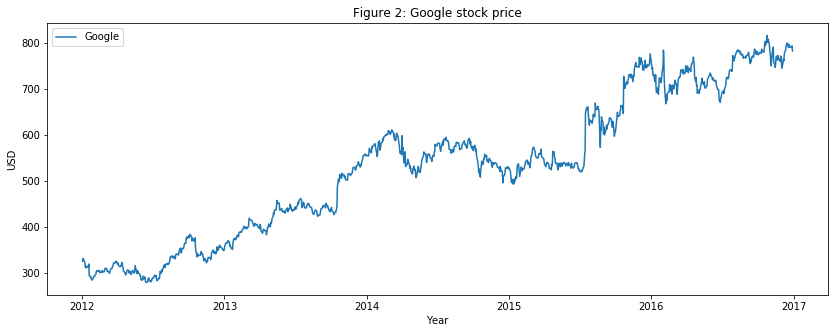

In [4]:
plt.figure(figsize=(14, 5))
plt.plot(df['Date'],df['Open'], label='Google')
# plt.vlines(datetime.date(2016,4, 20), 0, 270, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Year')
plt.ylabel('USD')

plt.title('Figure 2: Google stock price')
plt.legend()
plt.show()

In [50]:
def get_technical_indicators(df):

    # Create 7 and 21 days Moving Average
    df['ma7'] = df['Open'].rolling(window=7).mean()
    df['ma21'] = df['Open'].rolling(window=21).mean()
    
    # Create MACD

    df['26ema'] = df['Open'].ewm(span=26).mean()
    df['12ema'] = df['Open'].ewm(span=12).mean()
    df['MACD'] = (df['12ema']-df['26ema'])
    
    
#     def plot_rolling_mean(df, ax):
#         rm_BTC = pd.rolling_mean(df['Close'], window=WINDOW)
#         rm_BTC.plot(label='Rolling Mean', ax=ax)
#         return rm_BTC

    # Create Bollinger Bands
    
#     rstd_BTC = pd.rolling_std(df['Close'], window=WINDOW)
#     upper_band = rm_BTC + (2 * rstd_BTC)
#     lower_band = rm_BTC - (2 * rstd_BTC)

    df['20sd'] = df['Open'].rolling(60).std()
    df['upper_band'] = df['ma21'] + (df['20sd'].apply(lambda x: x*2))
    df['lower_band'] = df['ma21'] - (df['20sd'].apply(lambda x: x*2))
    
    # Create Exponential moving average
    df['ema'] = df['Open'].ewm(com=0.5).mean()
    
    # Create Momentum
    df['momentum'] = df['Open']-1
    
    return df

In [51]:
df_TI = get_technical_indicators(df[['Open']])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [52]:
df_TI

,Open,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
0,325.25,NaN,NaN,325.250000,325.250000,0.000000,NaN,NaN,NaN,325.250000,324.25
1,331.27,NaN,NaN,328.375769,328.510833,0.135064,NaN,NaN,NaN,329.765000,330.27
2,329.83,NaN,NaN,328.898260,329.025704,0.127444,NaN,NaN,NaN,329.810000,328.83
3,328.34,NaN,NaN,328.742195,328.809254,0.067059,NaN,NaN,NaN,328.817750,327.34
4,322.04,NaN,NaN,327.187928,326.970072,-0.217856,NaN,NaN,NaN,324.280579,321.04
5,313.70,NaN,NaN,324.486404,323.744746,-0.741657,NaN,NaN,NaN,317.217170,312.70
6,310.59,323.002857,NaN,322.015001,320.809311,-1.205690,NaN,NaN,NaN,312.797036,309.59
7,314.43,321.457143,NaN,320.792869,319.478047,-1.314822,NaN,NaN,NaN,313.885845,313.43
8,311.96,318.698571,NaN,319.483644,317.990710,-1.492934,NaN,NaN,NaN,312.601883,310.96
9,314.81,316.552857,NaN,318.838727,317.387966,-1.450760,NaN,NaN,NaN,314.073986,313.81


In [57]:
def plot_technical_indicators(df, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = df.shape[0]
    xmacd_ = shape_0-last_days
    
    df = df.iloc[-last_days:, :]
    x_ = range(3, df.shape[0])
    x_ =list(df.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(df['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(df['Open'],label='Closing Price', color='b')
    plt.plot(df['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(df['upper_band'],label='Upper Band', color='c')
    plt.plot(df['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, df['lower_band'], df['upper_band'], alpha=0.35)
    plt.title('Technical indicators for XXX - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
#     plt.subplot(2, 1, 2)
#     plt.title('MACD')
#     plt.plot(df['MACD'],label='MACD', linestyle='-.')
#     plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
#     plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
#     plt.plot(df['log_momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

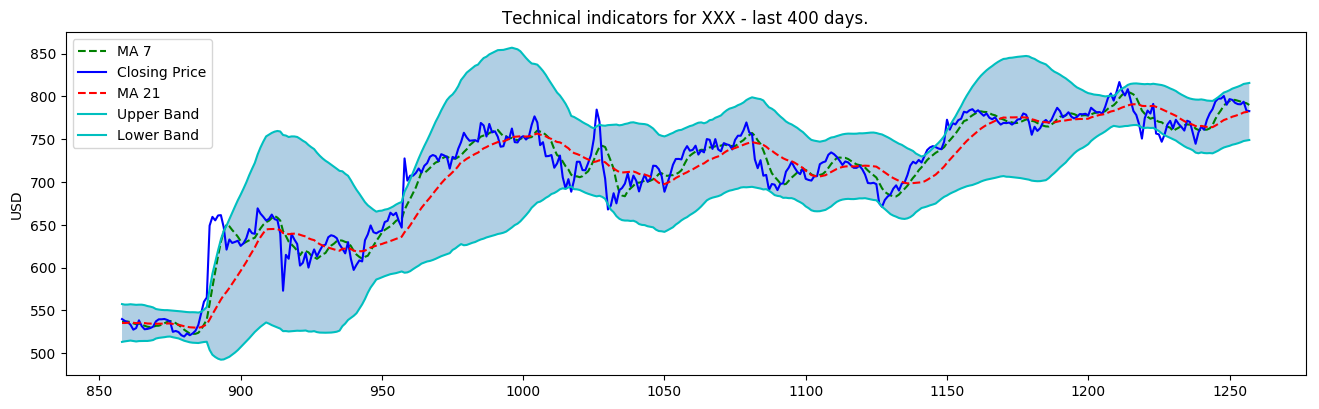

In [58]:
plot_technical_indicators(df_TI, 400)

In [28]:
df_x=pd.DataFrame({'x':np.random.randn(5)})

df_x['x'].ewm(halflife=2).mean()

0   -1.603848
1   -1.287793
2    0.004683
3   -0.353439
4    0.103338
Name: x, dtype: float64

In [29]:
df_x['x']

0   -1.603848
1   -1.064309
2    1.564840
3   -0.912346
4    0.930407
Name: x, dtype: float64

In [106]:
df = df.set_index(df['Date'])

In [107]:
df.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2012-01-03,2012-01-03,325.25,332.83,324.97,663.59,7380500
2012-01-04,2012-01-04,331.27,333.87,329.08,666.45,5749400
2012-01-05,2012-01-05,329.83,330.75,326.89,657.21,6590300
2012-01-06,2012-01-06,328.34,328.77,323.68,648.24,5405900
2012-01-09,2012-01-09,322.04,322.29,309.46,620.76,11688800


In [108]:
df_q = df.resample('Q-NOV')

In [67]:
df_q = pd.to_datetime(df['Date'])

In [110]:
df_q

DatetimeIndexResampler [freq=<QuarterEnd: startingMonth=11>, axis=0, closed=right, label=right, convention=start, base=0]

In [69]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500
1,1/4/2012,331.27,333.87,329.08,666.45,5749400
2,1/5/2012,329.83,330.75,326.89,657.21,6590300
3,1/6/2012,328.34,328.77,323.68,648.24,5405900
4,1/9/2012,322.04,322.29,309.46,620.76,11688800


In [70]:
df['Date'] = df_q

In [75]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,7380500
1,2012-01-04,331.27,333.87,329.08,666.45,5749400
2,2012-01-05,329.83,330.75,326.89,657.21,6590300
3,2012-01-06,328.34,328.77,323.68,648.24,5405900
4,2012-01-09,322.04,322.29,309.46,620.76,11688800


In [80]:
from datetime import datetime
a=np.datetime64('2002-06-28').astype(datetime)
plt(a,2)

TypeError: 'module' object is not callable

In [83]:
df['date_int'] = df['Date'].astype(np.int64)

In [84]:
df.head()

,Date,Open,High,Low,Close,Volume,date_int
0,2012-01-03,325.25,332.83,324.97,663.59,7380500,1325548800000000000
1,2012-01-04,331.27,333.87,329.08,666.45,5749400,1325635200000000000
2,2012-01-05,329.83,330.75,326.89,657.21,6590300,1325721600000000000
3,2012-01-06,328.34,328.77,323.68,648.24,5405900,1325808000000000000
4,2012-01-09,322.04,322.29,309.46,620.76,11688800,1326067200000000000


In [127]:
print(pd.show_versions())


INSTALLED VERSIONS
------------------
commit: None
python: 3.7.0.final.0
python-bits: 64
OS: Darwin
OS-release: 18.0.0
machine: x86_64
processor: i386
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8
LOCALE: en_US.UTF-8

pandas: 0.23.4
pytest: None
pip: 18.0
setuptools: 40.4.3
Cython: None
numpy: 1.15.4
scipy: None
pyarrow: None
xarray: None
IPython: 7.1.1
sphinx: None
patsy: None
dateutil: 2.7.5
pytz: 2018.7
blosc: None
bottleneck: None
tables: None
numexpr: None
feather: None
matplotlib: 3.0.2
openpyxl: None
xlrd: None
xlwt: None
xlsxwriter: None
lxml: None
bs4: None
html5lib: None
sqlalchemy: None
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None
None
